In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

: 

In [ ]:
#load the california house pricing dataset
from sklearn.datasets import fetch_california_housing

In [ ]:
housing = fetch_california_housing()

In [ ]:
housing.keys()

In [ ]:
print(housing.DESCR)

In [ ]:
print(housing.data)

In [ ]:
print(housing.target)

In [ ]:
print(housing.feature_names)

In [ ]:
# preparing the dataset
dataset=pd.DataFrame(housing.data, columns= housing.feature_names)

In [ ]:
dataset.head()

In [ ]:
dataset['Price']=housing.target

In [ ]:
dataset.head()

In [ ]:
dataset.info()

In [ ]:
# summarizing the stats of the data
dataset.describe()

In [ ]:
#check the missing values
dataset.isnull().sum()

In [ ]:
# EDA- Exploratory Data Analysis
#correlation
dataset.corr()

In [ ]:
import seaborn as sns
sns.pairplot(dataset)

In [ ]:
plt.scatter(dataset['MedInc'],dataset['Price'])
plt.xlabel("Income")
plt.ylabel("Price")

In [ ]:
sns.regplot(x="MedInc", y="Price", data=dataset)

In [ ]:
sns.regplot(x="Population", y="Price", data=dataset)

In [ ]:
#independent and dependent features
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
# train test split
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
# standardize the dataset
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)

In [ ]:
x_test=scaler.fit_transform(x_test)

In [ ]:
x_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [ ]:
x_test

array([[-1.15209909, -0.30267793, -0.48206459, ...,  0.60588341,
         0.22100564,  0.26245997],
       [-0.70179147,  0.09672999, -0.14607585, ..., -0.1827281 ,
        -0.20974655,  0.0379687 ],
       [-0.19920134,  1.85412486, -0.56735074, ..., -1.051554  ,
         1.03568912, -1.44866235],
       ...,
       [-0.18230355, -1.02161219, -0.65256612, ..., -0.3870047 ,
        -0.89801363,  0.8112164 ],
       [-0.10920338, -1.5009017 ,  0.03743213, ...,  0.38864246,
         1.0450533 , -0.86997375],
       [-0.42597077, -0.94173061, -0.81378442, ..., -0.22539751,
        -0.67327336,  0.64658947]])

In [ ]:
# model training

from sklearn. linear_model import LinearRegression

In [ ]:
regression=LinearRegression()

In [ ]:
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
# print the coefficients and intercept

print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [ ]:
print(regression.intercept_)

2.0692396089424165


In [ ]:
# on which parameters the model has been trained

regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
# prediction with test data 

reg_pred= regression.predict(x_test)

In [ ]:
reg_pred

array([0.70074765, 1.75651603, 2.73363614, ..., 2.08473667, 1.56199123,
       1.83521508])

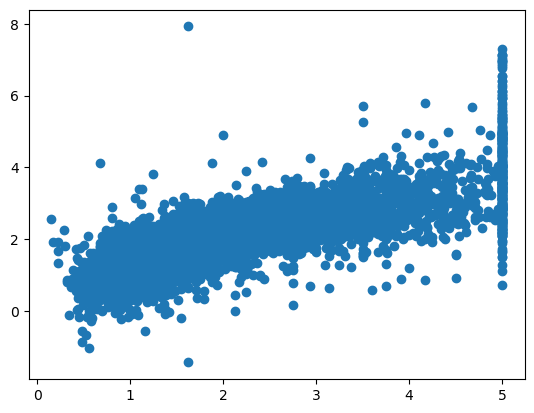

In [ ]:
# plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [ ]:
# errors
residuals=y_test-reg_pred

In [ ]:
residuals

20046   -0.223748
3024    -1.298516
15663    2.266374
20484   -0.656792
9814     0.153351
           ...   
17505    0.139354
13512   -0.207369
10842    0.099263
16559   -0.367991
5786     0.262785
Name: Price, Length: 6192, dtype: float64

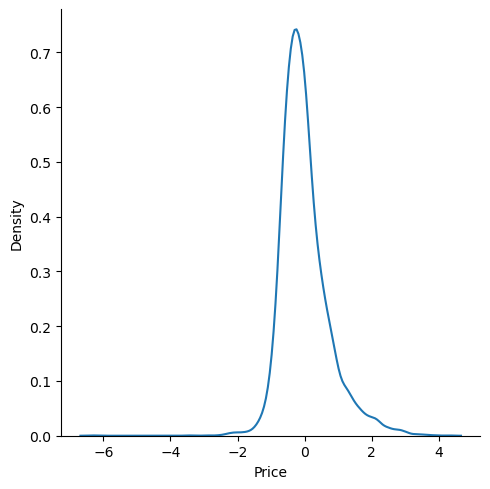

In [ ]:
# plot the residuals

sns.displot(residuals,kind="kde")

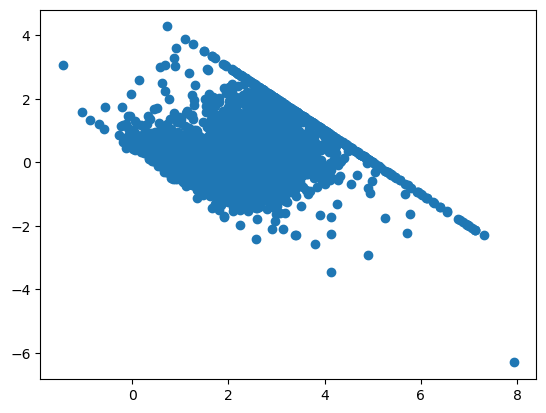

In [ ]:
# scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred, residuals)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5165967398485733
0.5238759626552133
0.7187466451042213


In [ ]:
# R square

# formula-

# R^2 = 1-SSR/SST

# r^2= coefficient of determination
# SSR= sum of squares of residuals
# SST= total sum of squares

from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.606414511241866


In [ ]:
# adjusted R square

# adjusted R^2=1-[(1-R^2)*(n-1)/(n-k-1)]

# R^2= the R^2 of the model
# n= the number of observations
# k=the number of predictor variables


In [ ]:
# display adjusted r squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6059052626715822

# new data prediction

In [ ]:
housing.data[0].reshape(1,-1).shape

(1, 8)

In [ ]:
# transformation of new data

scaler.transform(housing.data[0].reshape(1,-1))

C:\Users\Ekta Gupta\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.36730311,  0.97542743,  0.62520012, -0.13139628, -0.98531614,
        -0.26453569,  1.07314583, -1.34389976]])

In [ ]:
regression.predict(scaler.transform(housing.data[0].reshape(1,-1)))

C:\Users\Ekta Gupta\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.18565815])

# pickling the model file for deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [ ]:
# prediction

pickled_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

C:\Users\Ekta Gupta\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.18565815])